Support Vector Machine (SVM)
Invented in 1963 by Vladimir N. Vapnik and Alexey Ya. Chervonenkis while working at AT&T Bell Labs. Vladimir N. Vapnik joined Facebook AI Research in Nov 2014.

In 1992, Bernhard E. Boser, Isabelle M. Guyon and Vladimir N. Vapnik suggested a way to create nonlinear classifiers by applying the kernel trick to maximum-margin hyperplanes.

The current standard incarnation (soft margin) was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

References:

Support Vector Machine in Javascript Demo by Karpathy

SVM

Statsoft

Wikipedia

Scikit-Learn

Learning Outcomes:
Introduction
Linear SVM Classification
Polynomial Kernal
Radial Basis Function / Gaussian Kernel
Support Vector Regression



1. Introduction
Supervised learning methods used for classification, regression and outliers detection.

Let's assume we have two classes here - black and purple. In classification, we are interested in the best way to separate the two classes.
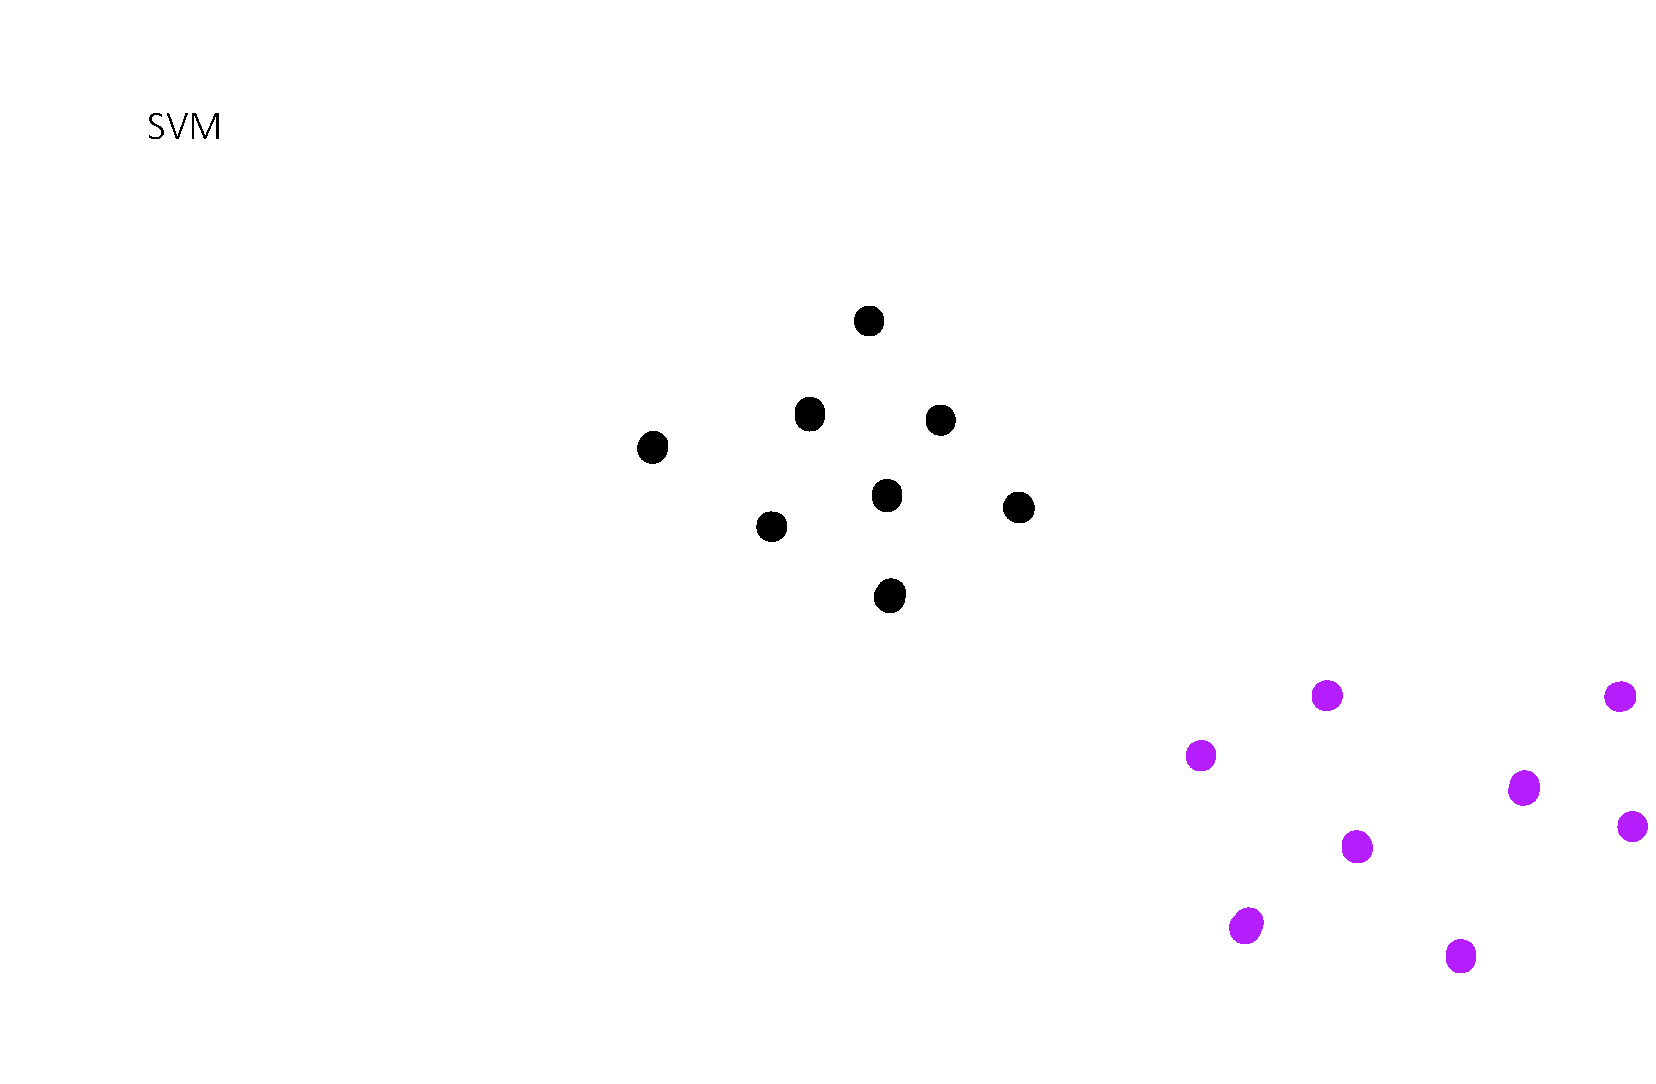


We can separate them with a line such as the example below. You can consider this as an example of how logistic regression would segregate the two classes.
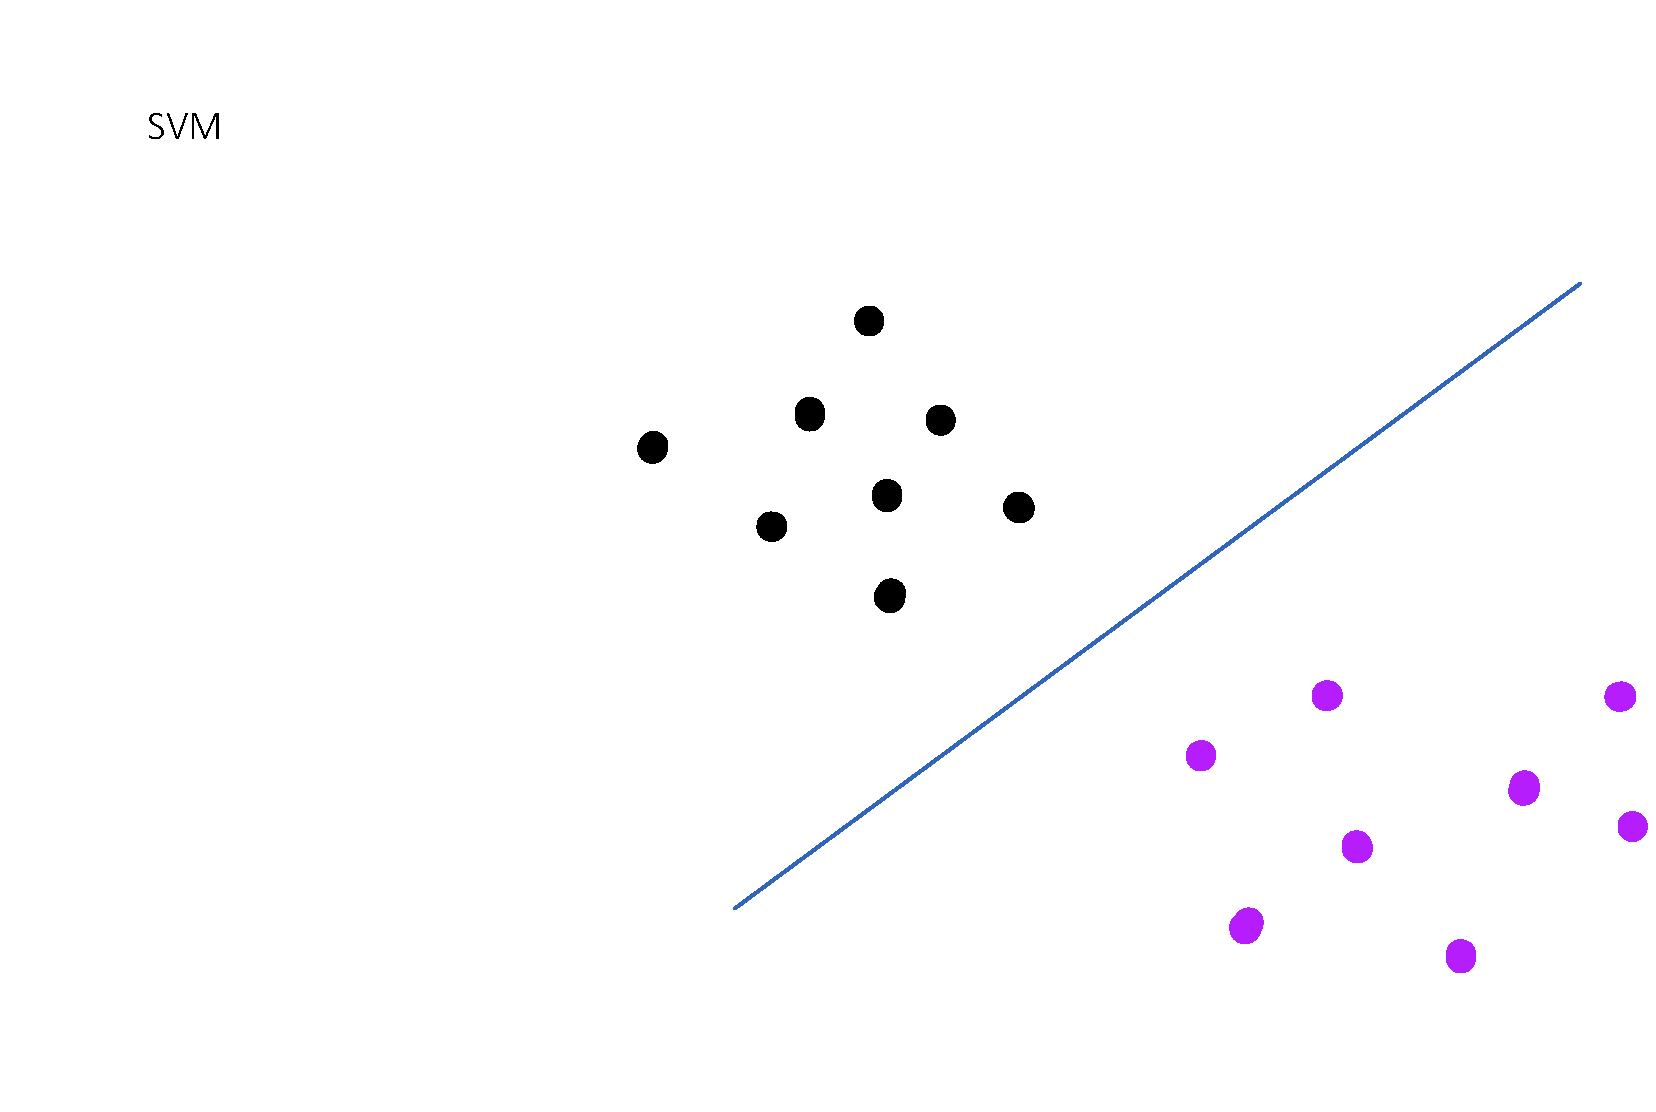

However, there are infinite lines (in 2-dimensional space) or hyperplanes (in 3-dimensional space) that can be used to separate the two classes as the example below illustrates.

The term hyperplane essentially means it is a subspace of one dimension less than its ambient space. If a space is 3-dimensional then its hyperplanes are the 2-dimensional planes, while if the space is 2-dimensional, its hyperplanes are the 1-dimensional lines. ~ Wikipedia
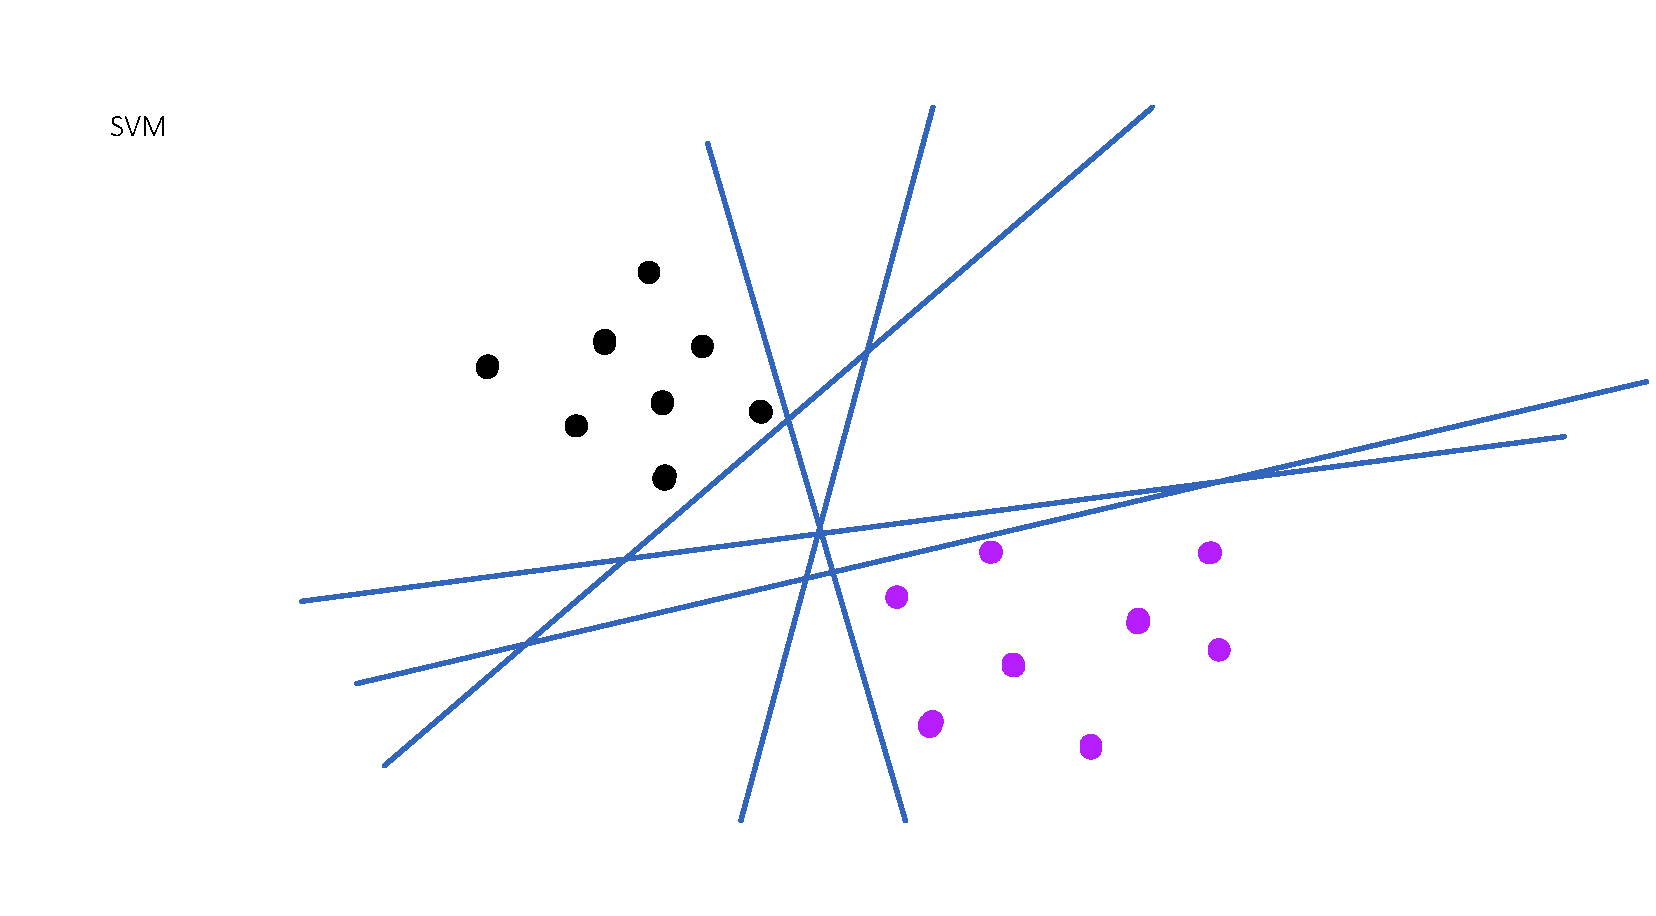
In SVM, the separating line, the solid brown line, is the line that allows for largest margin between the two classes.

SVM would place the separating line in the middle of the margin, also called maximum margin. SVM will optimise and locate the hyperplane that maximises the margin of the two classes.

The samples that are closest to the hyperplane are called support vectors, circled in red.

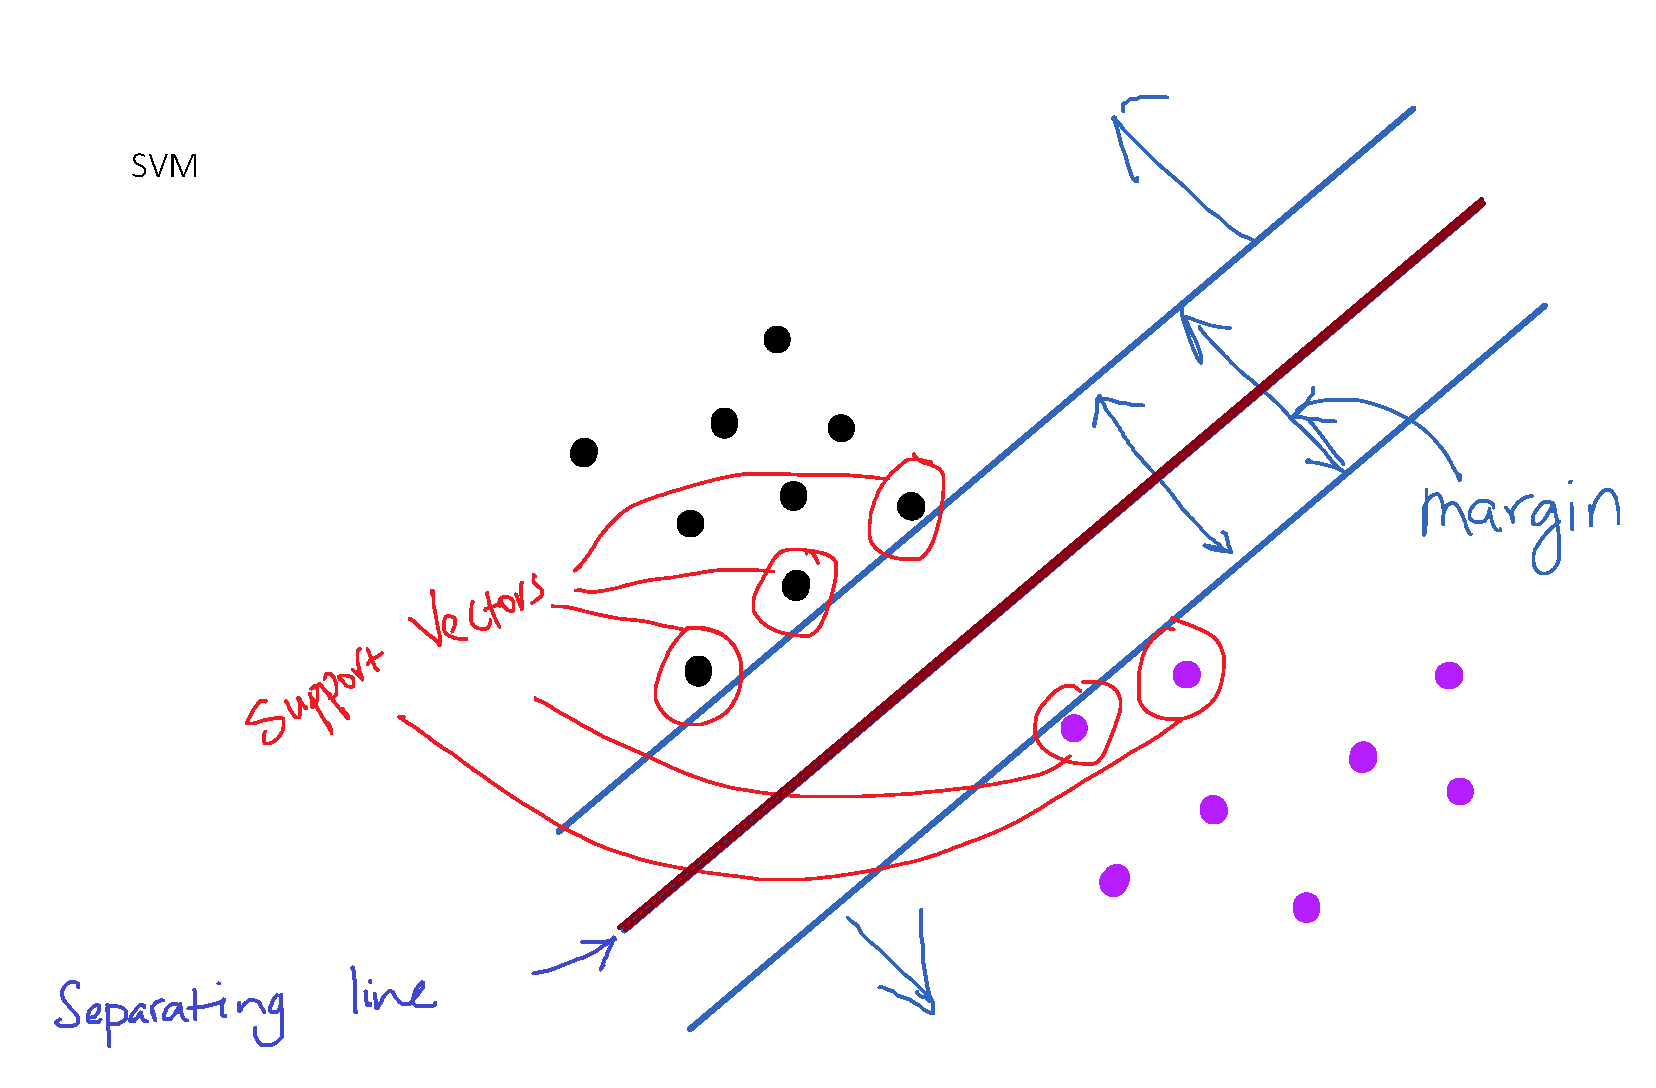

2. Linear SVM Classification
Support Vectors

Separate with a straight line (linearly separable)

Margin

Hard margin classification

Strictly based on those that are at the margin between the two classes
However, this is sensitive to outliers
Soft margin classification

Widen the margin and allows for violation
With Python Scikit-Learn, you control the width of the margin
Control with C hyperparameter
smaller C leads to a wider street but more margin violations
High C - fewer margin violations but ends up with a smaller margin
Note:

SVM are sensitive to feature scaling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import svm
sns.set_style('dark')

In [3]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.loc[:, ['petal_length','petal_width','species']].sample(5)

,petal_length,petal_width,species
147,5.2,2.0,virginica
123,4.9,1.8,virginica
124,5.7,2.1,virginica
12,1.4,0.1,setosa
83,5.1,1.6,versicolor


In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
species_to_num = {
    
    'setosa'     : 0,
    'versicolor' : 1,
    'virginica'  : 2,
}
df['tmp'] = df['species'].map(species_to_num)
y=df['tmp']

In [13]:
X= df.loc[:,['petal_length','petal_width']]

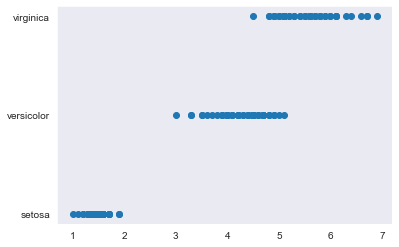

In [26]:
plt.scatter(df['petal_length'],df['species'])

Documentations on each:

LinearSVC

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

SVC

C-Support Vector Classification.

The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

In [14]:
# Here clf is a variable in which we are setting up the linear SCM classification model
# We are using petal length and petal width columns
# We use a small C which is a wider margin but more violations
C = 0.001
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X,y)

SVC(C=0.001, kernel='linear')

In [15]:
# This means that we are choosing petal length as value 6 and petal width as value 2
# Against the three types of irises
clf.predict([[6,2]])

array([2], dtype=int64)

In [27]:
# This is the code for plotting the svm model grid
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

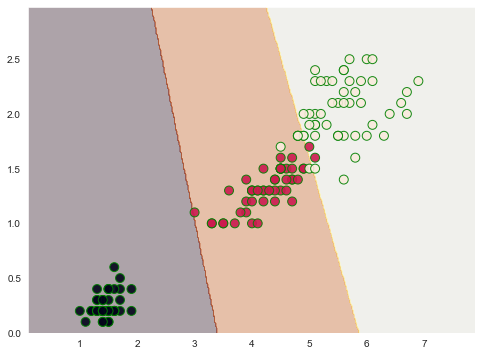

In [28]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');


In [29]:
# LINEAR SVM IMPLEMENTATION

df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

In [30]:
# Scale features

sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [31]:
C = 1.0 #0.01
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(kernel='linear')

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [35]:
# CROSS VALIDATION WITH TRAIN DATASET
# cv = 10 means the training data will be split into 10 parts
# default value of cv is 5
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9500
Accuracy SD: 		 0.0553


In [36]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [37]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [38]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))
# here all have high value 

Precision Score: 	 0.9500
Recall Score: 		 0.9500
F1 Score: 		 0.9500


In [39]:
# Cross validation with test data set

y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [40]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [41]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.9422
Recall Score: 		 0.9333
F1 Score: 		 0.9290


In [43]:
# Polynomial Kernel
# sometimes, to draw the margin between two clusters using a linear scale is hard and so we convert the data polynomially
# degree is used when the kernel is poly
# gamma is Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if ‘auto’, uses 1 / n_features.

C = 1.0
clf = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto')
clf.fit(X, y)

SVC(gamma='auto', kernel='poly')

In [44]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

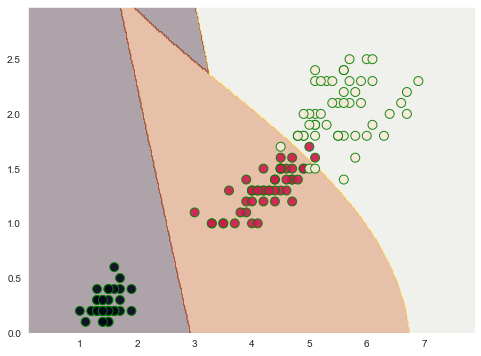

In [45]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

In [46]:
# POLYNOMIAL SVM IMPLEMENTATION

df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

In [47]:
# SCALE FEATURES

sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [64]:
C = 1.0 #0.01
clf = svm.SVC(kernel='poly', degree=5, C=C, gamma='auto') #5
clf.fit(X_std_train, y_train)

SVC(degree=5, gamma='auto', kernel='poly')

In [65]:
# Cross Validation with Train Dataset

res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9333
Accuracy SD: 		 0.0972


In [66]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [67]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0, 10, 34]], dtype=int64)

In [68]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9344
Recall Score: 		 0.9167
F1 Score: 		 0.9163


In [69]:
# CROSS VALIDATION WITH TEST DATASET

y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [70]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  4,  2]], dtype=int64)

In [71]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.8980
Recall Score: 		 0.8667
F1 Score: 		 0.8422


$$$4. Gaussian Radial Basis Function (rbf)$$$
$$The kernel function can be any of the following:$$

linear: $\langle x, x'\rangle$.
polynomial: $(\gamma \langle x, x'\rangle + r)^d$.

$d$ is specified by keyword degree

$r$ by coef0.

rbf: $\exp(-\gamma \|x-x'\|^2)$.

$\gamma$ is specified by keyword gamma must be greater than 0.

sigmoid $(\tanh(\gamma \langle x,x'\rangle + r))$

where $r$ is specified by coef0.

In [72]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0) #0.6

In [73]:
# SCALE FEATURES

sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [74]:
# RBF MEANS RADIAL BASIS FUNCTION WHERE THE DEGREE OF THE POLYNOMIAL IS NOT SPECIFIED
# THIS FUNCTION FINDS OUT THE BEST DEGREE
C = 1.0
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X_std_train, y_train)

SVC(gamma=0.7)

In [75]:
# CROSS VALIDATION OF TRAIN DATASET

res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9500
Accuracy SD: 		 0.0553


In [76]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [77]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [78]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584


In [79]:
# GRID SEARCH
# THIS SEARCHES THROUGH AN ARRAY OF MULTIPLE VALUES TO FIND THE OPTIMUM FIT
# TO GIVE PERFECT PRECISION

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [82]:
# we can improve this by scaling the features

pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))])
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), # THESE ARE 7 PLAUSIBLE VALUES
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)}

In [83]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy')

In [84]:
svm_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             scoring='accuracy', verbose=1)

In [87]:
svm_grid_rbf.best_score_

0.9583333333333334

In [88]:
print("Best Score: \t\t {0:.4f}".format(svm_grid_rbf.best_score_))

Best Score: 		 0.9583


In [89]:
best = svm_grid_rbf.best_estimator_.get_params()

In [90]:
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))

	clf__C: 	 0.50
	clf__gamma: 	 0.50


In [91]:
# CONDUCTING VALIDATION IN TEST DATASET
y_test_pred = svm_grid_rbf.predict(X_test)

In [92]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [93]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred, 
                                                       average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred, 
                                               average='weighted')))

Precision Score: 	 1.0000
Recall Score: 		 1.0000
F1 Score: 		 1.0000


In [94]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

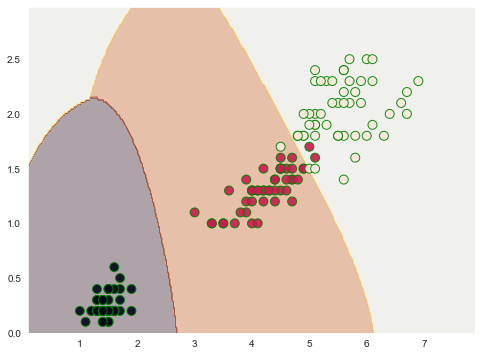

In [95]:
z = svm_grid_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

 # 5. Support Vector Regression

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [99]:
y = boston_data.target
X = df[['LSTAT']].values

In [100]:
svr = SVR(gamma='auto')
svr.fit(X, y)

SVR(gamma='auto')

In [101]:
sort_idx = X.flatten().argsort()

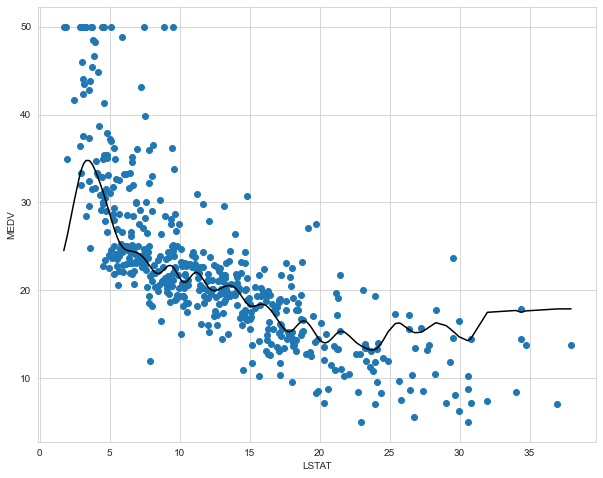

In [102]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], svr.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

# YOU CAN CALL THIS KIND OF OVERFITTING DUE TO THE ZIGZAG NTURE OF THE LINE

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [104]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [105]:
y_train_pred = svr.predict(X_train)

In [106]:
y_test_pred = svr.predict(X_test)

In [114]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 27.5635, test: 26.7051


In [107]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

# THE REDUCTION IN THE R2 SCORE SHOWS IMPROVEMENT IN THE TEST DATA

R^2 train: 0.5242, test: 0.5056


In [108]:
# POLYNOMIAL

svr = SVR(kernel='poly', C=1e3, degree=2, gamma='auto')
svr.fit(X_train, y_train)

SVR(C=1000.0, degree=2, gamma='auto', kernel='poly')

In [109]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [110]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

# THIS RESULT MAKES NO SENSE AS R2 SCORE CAN NOT HAVE A NEGATIVE VALUE

MSE train: 110.3334, test: 114.3676
R^2 train: -0.2553, test: -0.5349


In [111]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [112]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [113]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 27.5635, test: 26.7051
R^2 train: 0.6864, test: 0.6416


# 6. Advantages and Disadvantages
The advantages of support vector machines are:

Effective in high dimensional spaces.
Uses only a subset of training points (support vectors) in the decision function.
Many different Kernel functions can be specified for the decision function.
Linear
Polynomial
RBF
Sigmoid
Custom
The disadvantages of support vector machines include:

Beware of overfitting when num_features > num_samples.
Choice of Kernel and Regularization can have a large impact on performance
No probability estimates

# Summary
Class	Out-of-core support	Kernel Trick
SGDClassifier	Yes	No
LinearSVC	No	No
SVC	No	Yes
Note: All require features scaling

Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. See section Preprocessing data for more details on scaling and normalization. ~ scikit-learn documentation

Where to From Here
LIBSVM
LIBLINEAR
Hands-On Machine Learning with Scikit-Learn and TensorFlow
Python Data Science Handbook
Python Machine Learning, 2E
Statistics for Machine Learning
ConvNetJS